# Importing Dependencies

In [ ]:
pip install yfinance

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

# Computing the expected return due to order imbalance

I had to import market historical data as a data frame. I used the Yahoo Finance API to get historical data for Naspers (NPN.JO) for the past 10 years. (The code should work for any other stock, just replace its name into the "stock name" variable.)

In order to get the results I desired, I had to do a lot of data manipulating and preprocessing but it helped me understand the data, and also the equations I'm trying to represent, better. 

The observable we are interested in is the change in logarythmic share price within an interval $\Delta t$ $$G_{\Delta t}(t)=lnS(t) -lnS(t-\Delta t)$$ where $S(t)$ is the share price at time $t$. 

The Langevin equasion proposed by Bernd Rosenow is $$\tau \partial_t{g(t)=-rg(t)+\mu q(t) + f(t)}$$

where $f(t)$ is fluctuation noise and $q(t)$ is the order volume imbalance of buyers and sellers of a share. 

The price impact function describes the functional relationship between the expectation value $\langle G_{\Delta t}\rangle _{Q_{\Delta t}}$ due to the volume imbalance 

Succeptibility $\chi$ is defined to be is defined as the slope of the price impact function close to zero volume imbalance. $$\chi = \lim_{\Delta Q \to 0}\frac{\langle G_{\Delta t}\rangle _{Q_{\Delta t}}}{\Delta Q}$$

## Historical market data processing

You can edit the averaging out bin with the variable "n"

In [3]:
## Defining constants

stock_name = "NPN.JO"
n = 60                                       # number to average out in the plot 

## Getting historical market data

share = yf.Ticker(stock_name)

hist = share.history(period="10y", interval="1d")
hist = hist.iloc[::-1]

## Modifying the data

hist['G_dt'] = np.log(hist['Close']) - np.log(hist['Close'].shift(-1))
hist['G_dt^2'] = hist['G_dt']**2
hist['Volume'] = hist['Volume'] * hist['G_dt'] / abs(hist['G_dt'])
hist.dropna(subset=['Volume','G_dt','G_dt^2'], inplace = True)

hist1 = hist[['Volume','G_dt', 'G_dt^2']]
hist1 = hist1.groupby(['Volume']).mean()
hist1 = hist1.reset_index()
hist1['chi'] = hist1['G_dt']/hist1['Volume'] 
hist2 = hist1.iloc[:,:]

hist1 = hist1.groupby(np.arange(len(hist1))//n).mean()

## Values to be plotted

X = hist1.iloc[:, 0].values
y = hist1.iloc[:,1].values




# Plot of the Price impact function

In [ ]:
plt.scatter(X,y, s=0.6)
plt.xlabel(r'$\Delta Q$')
plt.ylabel(r'$\langle G_{\Delta t}\rangle$')
plt.title("Expactation value of returns vs volume imbalance")
plt.show()

This is the plot of the Price impact, which is the expected return due to an order imbalance, ploted against the order imbalance in the markets for a specific stock. 

This plot has the shape of a scaled hyperbolic tangent function. But most importantly, there is a linear portion for small order imbalances. 

# Computing relation of succeptibility with standard deviation

In [ ]:
m=120         # m serves as average for plot

hist2["STD"] = np.sqrt(hist2["G_dt^2"]) #I first calculated the return, then squared it. took its average w.r.t volume and now im taking its sqrt
hist2 = hist2.groupby(["STD"]).mean()
hist2 = hist2.reset_index()
hist2 = hist2.groupby(np.arange(len(hist2))//m).mean()

z = hist2.iloc[:,-1].values
k = hist2.iloc[:,0].values



Beneath I computed the relation between the susseptibility to price change and the standard diviation $\frac{1}{r}$ of returns per trade. 


# Plotting relation

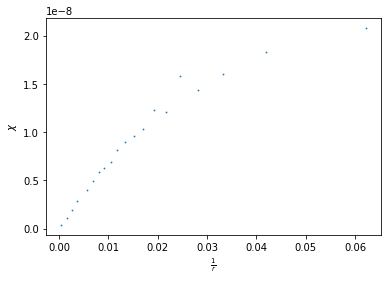

In [ ]:
plt.scatter(k,z, s=0.6)
#plt.xlim([0,0.05])
#plt.ylim([-0.005, 0.005])
plt.ylabel(r'$\chi$')
plt.xlabel(r'$\frac{1}{r}$')
#plt.title("Succeptability of price change agains standard diviation")
plt.show()